In [2]:
import os
import glob
import zipfile
import functools

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['figure.figsize'] = (12,12)

from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import pandas as pd
from PIL import Image

import warnings
warnings.filterwarnings('ignore')

In [3]:
import tensorflow as tf
# import tensorflow.contrib as tfcontrib # directly call tf.image.translate
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import models
from tensorflow.keras import backend as K

2024-04-11 17:55:53.682569: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-11 17:55:53.682691: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-11 17:55:53.945389: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [12]:
current_dir = '/kaggle/input/dataset'
print(current_dir)

/kaggle/input/dataset


In [14]:
image_dir = os.path.join(current_dir, 'images/training_set/haemorrhages_patch')
label_dir = os.path.join(current_dir, 'labels/training_set/haemorrhages_binary_patch')
print("Training Images: ", len(os.listdir(image_dir)))
print("Training Labels: ", len(os.listdir(label_dir)))

Training Images:  2807
Training Labels:  2807


In [15]:
validation_image_dir = os.path.join(current_dir, 'images/testing_set/haemorrhages_patch')
validation_label_dir = os.path.join(current_dir, 'labels/testing_set/haemorrhages_binary_patch')
print("Training Images: ", len(os.listdir(validation_image_dir)))
print("Training Labels: ", len(os.listdir(validation_label_dir)))

Training Images:  1337
Training Labels:  1337


In [16]:
x_train_filenames  = []
y_train_filenames = []

for imgs_name in os.listdir(image_dir):
    x_train_filenames.append(os.path.join(image_dir, "{}".format(imgs_name)))
    y_train_filenames.append(os.path.join(label_dir, "{}".format(imgs_name)))

In [17]:
x_val_filenames = []
y_val_filenames = []

for val_imgs_name in os.listdir(validation_image_dir):
    x_val_filenames.append(os.path.join(validation_image_dir, "{}".format(val_imgs_name)))
    y_val_filenames.append(os.path.join(validation_label_dir, "{}".format(val_imgs_name)))

In [18]:
num_train_examples = len(x_train_filenames)
num_train_label_examples = len(y_train_filenames)
num_val_examples = len(x_val_filenames)
num_val_label_examples = len(y_val_filenames)

print("Number of training Images examples: {}".format(num_train_examples))
print("Number of training Labels examples: {}".format(num_train_label_examples))
print("")
print("Number of validation Images examples: {}".format(num_val_examples))
print("Number of validation Labels examples: {}".format(num_val_label_examples))

Number of training Images examples: 2807
Number of training Labels examples: 2807

Number of validation Images examples: 1337
Number of validation Labels examples: 1337


In [19]:
# Here's what the paths look like
x_train_filenames[:10]

['/kaggle/input/dataset/images/training_set/haemorrhages_patch/IDRiD_50_p69.jpg',
 '/kaggle/input/dataset/images/training_set/haemorrhages_patch/IDRiD_33_p71.jpg',
 '/kaggle/input/dataset/images/training_set/haemorrhages_patch/IDRiD_31_p24.jpg',
 '/kaggle/input/dataset/images/training_set/haemorrhages_patch/IDRiD_10_p44.jpg',
 '/kaggle/input/dataset/images/training_set/haemorrhages_patch/IDRiD_36_p78.jpg',
 '/kaggle/input/dataset/images/training_set/haemorrhages_patch/IDRiD_11_p74.jpg',
 '/kaggle/input/dataset/images/training_set/haemorrhages_patch/IDRiD_17_p134.jpg',
 '/kaggle/input/dataset/images/training_set/haemorrhages_patch/IDRiD_20_p147.jpg',
 '/kaggle/input/dataset/images/training_set/haemorrhages_patch/IDRiD_49_p44.jpg',
 '/kaggle/input/dataset/images/training_set/haemorrhages_patch/IDRiD_10_p115.jpg']

In [20]:
y_train_filenames[:10]

['/kaggle/input/dataset/labels/training_set/haemorrhages_binary_patch/IDRiD_50_p69.jpg',
 '/kaggle/input/dataset/labels/training_set/haemorrhages_binary_patch/IDRiD_33_p71.jpg',
 '/kaggle/input/dataset/labels/training_set/haemorrhages_binary_patch/IDRiD_31_p24.jpg',
 '/kaggle/input/dataset/labels/training_set/haemorrhages_binary_patch/IDRiD_10_p44.jpg',
 '/kaggle/input/dataset/labels/training_set/haemorrhages_binary_patch/IDRiD_36_p78.jpg',
 '/kaggle/input/dataset/labels/training_set/haemorrhages_binary_patch/IDRiD_11_p74.jpg',
 '/kaggle/input/dataset/labels/training_set/haemorrhages_binary_patch/IDRiD_17_p134.jpg',
 '/kaggle/input/dataset/labels/training_set/haemorrhages_binary_patch/IDRiD_20_p147.jpg',
 '/kaggle/input/dataset/labels/training_set/haemorrhages_binary_patch/IDRiD_49_p44.jpg',
 '/kaggle/input/dataset/labels/training_set/haemorrhages_binary_patch/IDRiD_10_p115.jpg']

In [21]:
x_val_filenames[:10]

['/kaggle/input/dataset/images/testing_set/haemorrhages_patch/IDRiD_75_p2.jpg',
 '/kaggle/input/dataset/images/testing_set/haemorrhages_patch/IDRiD_61_p41.jpg',
 '/kaggle/input/dataset/images/testing_set/haemorrhages_patch/IDRiD_59_p54.jpg',
 '/kaggle/input/dataset/images/testing_set/haemorrhages_patch/IDRiD_61_p20.jpg',
 '/kaggle/input/dataset/images/testing_set/haemorrhages_patch/IDRiD_60_p57.jpg',
 '/kaggle/input/dataset/images/testing_set/haemorrhages_patch/IDRiD_79_p102.jpg',
 '/kaggle/input/dataset/images/testing_set/haemorrhages_patch/IDRiD_65_p57.jpg',
 '/kaggle/input/dataset/images/testing_set/haemorrhages_patch/IDRiD_79_p153.jpg',
 '/kaggle/input/dataset/images/testing_set/haemorrhages_patch/IDRiD_61_p132.jpg',
 '/kaggle/input/dataset/images/testing_set/haemorrhages_patch/IDRiD_67_p55.jpg']

In [22]:
y_val_filenames[:10]

['/kaggle/input/dataset/labels/testing_set/haemorrhages_binary_patch/IDRiD_75_p2.jpg',
 '/kaggle/input/dataset/labels/testing_set/haemorrhages_binary_patch/IDRiD_61_p41.jpg',
 '/kaggle/input/dataset/labels/testing_set/haemorrhages_binary_patch/IDRiD_59_p54.jpg',
 '/kaggle/input/dataset/labels/testing_set/haemorrhages_binary_patch/IDRiD_61_p20.jpg',
 '/kaggle/input/dataset/labels/testing_set/haemorrhages_binary_patch/IDRiD_60_p57.jpg',
 '/kaggle/input/dataset/labels/testing_set/haemorrhages_binary_patch/IDRiD_79_p102.jpg',
 '/kaggle/input/dataset/labels/testing_set/haemorrhages_binary_patch/IDRiD_65_p57.jpg',
 '/kaggle/input/dataset/labels/testing_set/haemorrhages_binary_patch/IDRiD_79_p153.jpg',
 '/kaggle/input/dataset/labels/testing_set/haemorrhages_binary_patch/IDRiD_61_p132.jpg',
 '/kaggle/input/dataset/labels/testing_set/haemorrhages_binary_patch/IDRiD_67_p55.jpg']

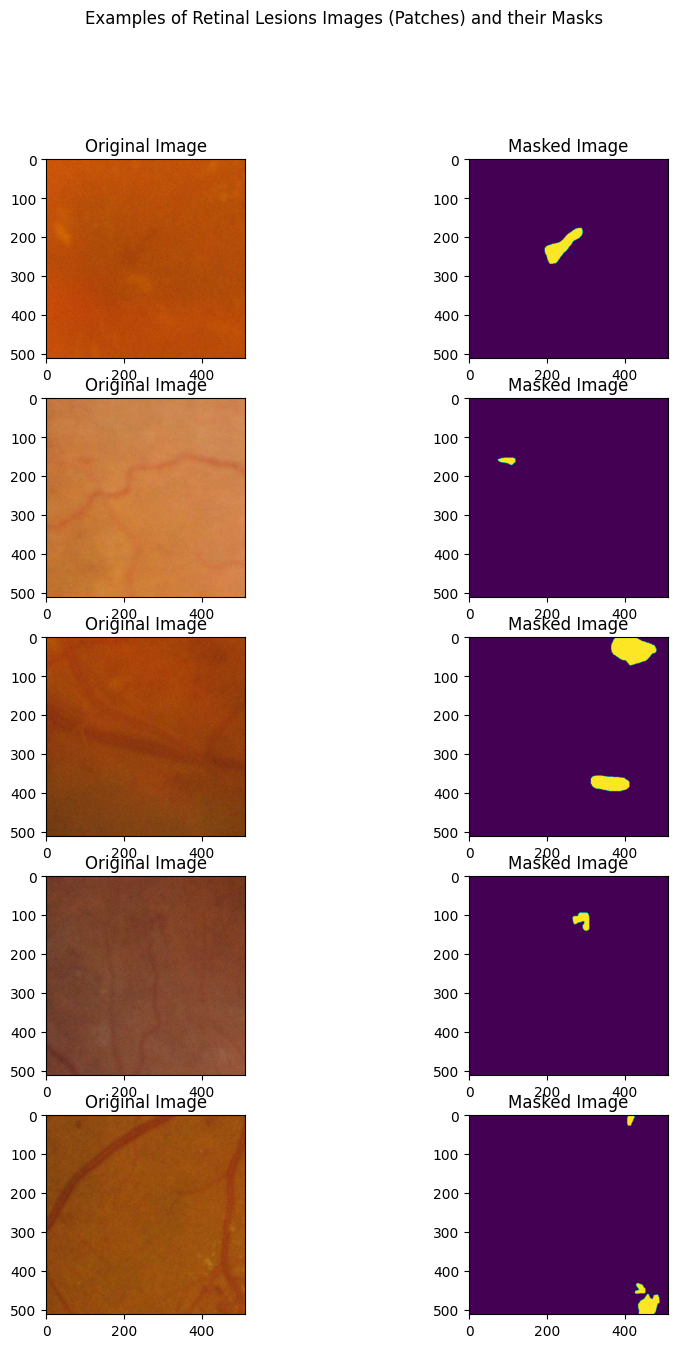

In [25]:
# Retinal Lesions with their binary masks
display_num = 5
r_choices = np.random.choice(num_train_examples, display_num)

plt.figure(figsize = (10, 15))
for i in range(0, display_num * 2, 2):
    img_num = r_choices[i // 2]
    # print(img_num)
    x_pathname = x_train_filenames[img_num]
    y_pathname = y_train_filenames[img_num]

    plt.subplot(display_num, 2, i + 1)
    plt.imshow(mpimg.imread(x_pathname))
    plt.title("Original Image")

    example_labels = Image.open(y_pathname)
    label_vals = np.unique(example_labels)

    plt.subplot(display_num, 2, i + 2)
    plt.imshow(example_labels)
    plt.title("Masked Image")

plt.suptitle("Examples of Retinal Lesions Images (Patches) and their Masks")
plt.show()

In [26]:
img_shape = (256, 256, 3)
batch_size = 4
epochs = 10

In [27]:
# Preprocessing each pathname

def _process_pathnames(fname, label_path):
    img_str = tf.io.read_file(fname)
    img = tf.image.decode_jpeg(img_str, channels = 3)

    label_img_str = tf.io.read_file(label_path)
    label_img = tf.image.decode_jpeg(label_img_str, channels = 1)
    label_img = label_img[:, :, 0]
    label_img = tf.expand_dims(label_img, axis = -1)
    return img, label_img

In [28]:
# !pip install tensorflow-addons
# !pip install --upgrade tensorflow-addons

In [29]:
# !pip show tensorflow tensorflow-addons

In [30]:
# import tensorflow_addons as tfa

In [31]:
def shift_img(output_img, label_img, width_shift_range, height_shift_range):
    """This fn will perform the horizontal or vertical shift"""
    if width_shift_range or height_shift_range:
        if width_shift_range:
            width_shift_range = tf.random.uniform([],
                                              -width_shift_range * img_shape[1],
                                              width_shift_range * img_shape[1])
        if height_shift_range:
            height_shift_range = tf.random.uniform([],
                                               -height_shift_range * img_shape[0],
                                               height_shift_range * img_shape[0])
    # Translate both
    output_img = tfa.image.translate(output_img,
                                             [width_shift_range, height_shift_range])
    label_img = tfa.image.translate(label_img,
                                             [width_shift_range, height_shift_range])
    return output_img, label_img

In [32]:
def flip_img(horizontal_flip, tr_img, label_img):
    if horizontal_flip:
        flip_prob = tf.random.uniform([], 0.0, 1.0)
        tr_img, label_img = tf.cond(tf.less(flip_prob, 0.5),
                                lambda: (tf.image.flip_left_right(tr_img), tf.image.flip_left_right(label_img)),
                                lambda: (tr_img, label_img))
    return tr_img, label_img

In [33]:
def _augment(img,
             label_img,
             resize=None,
             scale=1,
             hue_delta=0,
             horizontal_flip=False,
             width_shift_range=0,
             height_shift_range=0):

    if resize is not None:
        label_img = tf.image.resize(label_img, resize)
        img = tf.image.resize(img, resize)

    if hue_delta:
        img = tf.image.random_hue(img, hue_delta)

    img, label_img = flip_img(horizontal_flip, img, label_img)
    # img, label_img = shift_img(img, label_img, width_shift_range, height_shift_range)
    # label_img = tf.to_float(label_img) * scale
    label_img = tf.cast(label_img, tf.float32) * scale
    img = tf.cast(img, tf.float32) * scale
    return img, label_img

In [34]:
def get_baseline_dataset(filenames,
                         labels,
                         preproc_fn=functools.partial(_augment),
                         threads=5,
                         batch_size=batch_size,
                         shuffle=True):
    num_x = len(filenames)

    dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))

    dataset = dataset.map(_process_pathnames, num_parallel_calls=threads)
    if preproc_fn.keywords is not None and 'resize' not in preproc_fn.keywords:
        assert batch_size == 1, "Batching images must be of the same size"

    dataset = dataset.map(preproc_fn, num_parallel_calls=threads)

    if shuffle:
        dataset = dataset.shuffle(num_x)

    dataset = dataset.repeat().batch(batch_size)
    return dataset

In [35]:
tr_cfg = {
    'resize': [img_shape[0], img_shape[1]],
    'scale': 1 / 255.,
    'hue_delta': 0.1,
    'horizontal_flip': True,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1
}
tr_preprocessing_fn = functools.partial(_augment, **tr_cfg)

In [36]:
val_cfg = {
    'resize': [img_shape[0], img_shape[1]],
    'scale': 1 / 255.,
}
val_preprocessing_fn = functools.partial(_augment, **val_cfg)

In [37]:
train_ds = get_baseline_dataset(x_train_filenames,
                                y_train_filenames,
                                preproc_fn=tr_preprocessing_fn,
                                batch_size=batch_size)
val_ds = get_baseline_dataset(x_val_filenames,
                              y_val_filenames,
                              preproc_fn=val_preprocessing_fn,
                              batch_size=batch_size)

In [38]:
# temp_ds = get_baseline_dataset(x_val_filenames,
#                                y_val_filenames,
#                                preproc_fn=tr_preprocessing_fn,
#                                batch_size=1,
#                                shuffle=False)

# data_aug_iter = tf.compat.v1.data.make_one_shot_iterator(temp_ds)
# next_element = data_aug_iter.get_next()
# # with tf.Session() as sess:
# batch_of_imgs, label = next_element
# plt.figure(figsize=(10, 10))
# img = batch_of_imgs[0]

# plt.subplot(1, 2, 1)
# plt.imshow(img)

# plt.subplot(1, 2, 2)
# plt.imshow(label[0, :, :, 0])
# plt.show()

In [39]:
# model
def conv_block(input_tensor, num_filters):
    encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(input_tensor)
    encoder = layers.BatchNormalization()(encoder)
    encoder = layers.Activation('relu')(encoder)
    encoder = layers.Conv2D(num_filters, (3, 3), padding='same')(encoder)
    encoder = layers.BatchNormalization()(encoder)
    encoder = layers.Activation('relu')(encoder)
    return encoder

def encoder_block(input_tensor, num_filters):
    encoder = conv_block(input_tensor, num_filters)
    encoder_pool = layers.MaxPooling2D((2, 2), strides=(2, 2))(encoder)

    return encoder_pool, encoder

def decoder_block(input_tensor, concat_tensor, num_filters):
    decoder = layers.Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(input_tensor)
    decoder = layers.concatenate([concat_tensor, decoder], axis=-1)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    decoder = layers.Conv2D(num_filters, (3, 3), padding='same')(decoder)
    decoder = layers.BatchNormalization()(decoder)
    decoder = layers.Activation('relu')(decoder)
    return decoder

In [40]:
inputs = layers.Input(shape=img_shape)
# 256

encoder0_pool, encoder0 = encoder_block(inputs, 32)
# 128

encoder1_pool, encoder1 = encoder_block(encoder0_pool, 64)
# 64

encoder2_pool, encoder2 = encoder_block(encoder1_pool, 128)
# 32

encoder3_pool, encoder3 = encoder_block(encoder2_pool, 256)
# 16

encoder4_pool, encoder4 = encoder_block(encoder3_pool, 512)
# 8

center = conv_block(encoder4_pool, 1024)
# center

decoder4 = decoder_block(center, encoder4, 512)
# 16

decoder3 = decoder_block(decoder4, encoder3, 256)
# 32

decoder2 = decoder_block(decoder3, encoder2, 128)
# 64

decoder1 = decoder_block(decoder2, encoder1, 64)
# 128

decoder0 = decoder_block(decoder1, encoder0, 32)
# 256

outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(decoder0)

In [41]:
model = models.Model(inputs=[inputs], outputs=[outputs])

In [42]:
# custom metrices
def dice_coeff(y_true, y_pred):
    smooth = 1.
    # Flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)
    return score

In [43]:
def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss

In [44]:
def bce_dice_loss(y_true, y_pred):
    loss = losses.binary_crossentropy(y_true, y_pred) + dice_loss(y_true, y_pred)
    return loss

In [45]:
model.compile(optimizer='adam', loss=bce_dice_loss, metrics=[dice_loss])

model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        896 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        128 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      9,248 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        128 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │     36,928 │ activation_2[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_4[0][0]  

 Total params: 31,126,497 (118.74 MB)

 Trainable params: 31,110,497 (118.68 MB)

 Non-trainable params: 16,000 (62.50 KB)

In [46]:
save_model_path = 'haemorrhages_segmentation_model.keras'
cp = tf.keras.callbacks.ModelCheckpoint(filepath=save_model_path, monitor='val_dice_loss', save_best_only=True, verbose=1)

In [47]:
history = model.fit(train_ds,
                   steps_per_epoch=int(np.ceil(num_train_examples / float(batch_size))),
                   epochs=epochs,
                   validation_data=val_ds,
                   validation_steps=int(np.ceil(num_val_examples / float(batch_size))),
                   callbacks=[cp],verbose=1)

Epoch 1/10
  1/702 ━━━━━━━━━━━━━━━━━━━━ 17:01:47 87s/step - dice_loss: 0.9715 - loss: 2.3694

I0000 00:00:1712858468.339197      90 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


702/702 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - dice_loss: 0.9441 - loss: 1.2593
Epoch 1: val_dice_loss improved from inf to 0.96353, saving model to haemorrhages_segmentation_model.keras
702/702 ━━━━━━━━━━━━━━━━━━━━ 194s 153ms/step - dice_loss: 0.9441 - loss: 1.2591 - val_dice_loss: 0.9635 - val_loss: 1.1358
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - dice_loss: 0.9227 - loss: 1.0674
Epoch 2: val_dice_loss did not improve from 0.96353
702/702 ━━━━━━━━━━━━━━━━━━━━ 94s 133ms/step - dice_loss: 0.9227 - loss: 1.0674 - val_dice_loss: 0.9722 - val_loss: 1.1468
Epoch 3/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - dice_loss: 0.9156 - loss: 1.0585
Epoch 3: val_dice_loss did not improve from 0.96353
702/702 ━━━━━━━━━━━━━━━━━━━━ 93s 133ms/step - dice_loss: 0.9156 - loss: 1.0585 - val_dice_loss: 0.9739 - val_loss: 1.1416
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - dice_loss: 0.8997 - loss: 1.0488
Epoch 4: val_dice_loss did not improve from 0.96353
702/702 ━━━━━━━━━━━━━━━━━

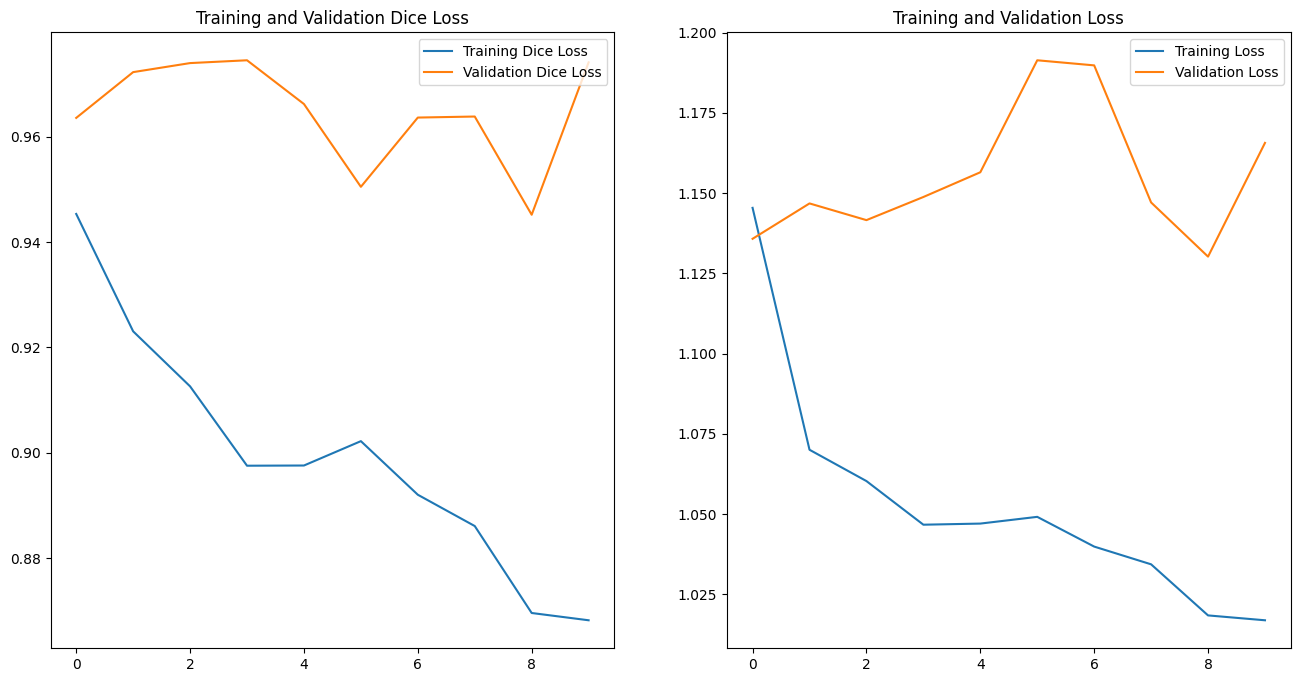

In [48]:
# Visualize training process
dice = history.history['dice_loss']
val_dice = history.history['val_dice_loss']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, dice, label='Training Dice Loss')
plt.plot(epochs_range, val_dice, label='Validation Dice Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Dice Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [49]:

model = models.load_model(save_model_path, custom_objects={'bce_dice_loss': bce_dice_loss,
                                                           'dice_loss': dice_loss})

In [ ]:

# data_aug_iter = tf.compat.v1.data.make_one_shot_iterator(val_ds)
# next_element = data_aug_iter.get_next()


# plt.figure(figsize=(10, 20))
# count = 0
# # for i in range(5):
# for batch_of_imgs, label in data_aug_iter:
#     #     batch_of_imgs, label = tf.keras.backend.get_session().run(next_element)
#     #     batch_of_imgs, label = data_aug_iter()
#     count = count + 1
#     img = batch_of_imgs[0]
#     predicted_label = model.predict(batch_of_imgs)[0]

#     plt.subplot(5, 3, 3 * i + 1)
#     plt.imshow(img)
#     plt.title("Input image")

#     plt.subplot(5, 3, 3 * i + 2)
#     plt.imshow(label[0, :, :, 0])
#     plt.title("Actual Mask")
#     plt.subplot(5, 3, 3 * i + 3)
#     plt.imshow(predicted_label[:, :, 0]>0.9, cmap='gray')
#     plt.title("Predicted Mask")
    
#     if count == 5:
#         break
# plt.suptitle("Examples of Input Image, Label, and Prediction")
# plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


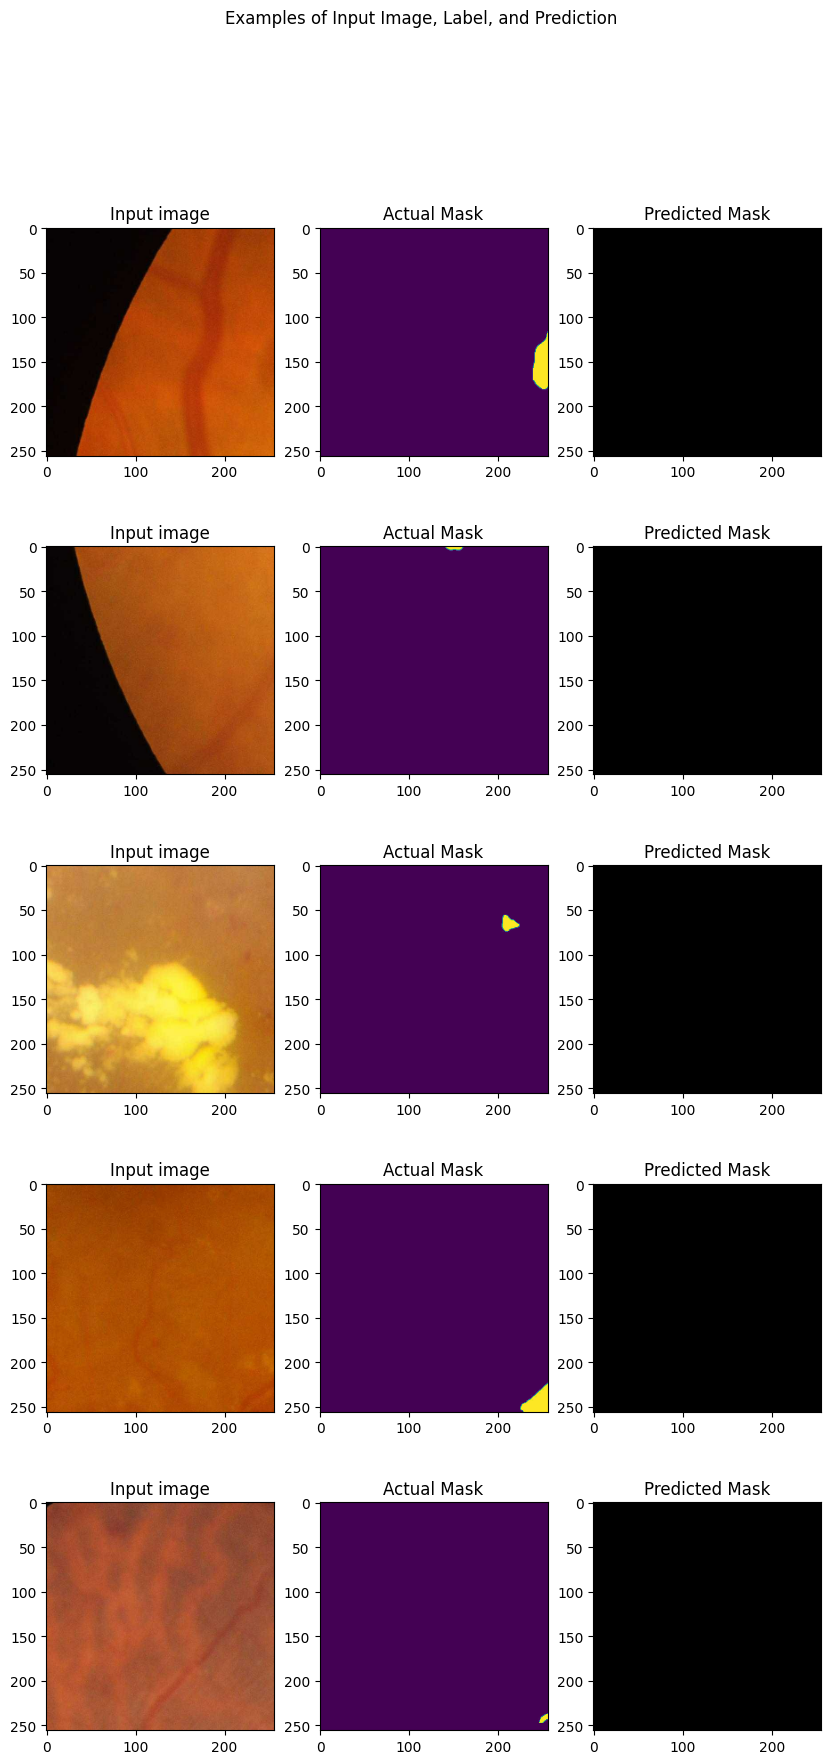

In [50]:
data_aug_iter = tf.compat.v1.data.make_one_shot_iterator(val_ds)
next_element = data_aug_iter.get_next()

plt.figure(figsize=(10, 20))

# Loop over the batches
for i, (batch_of_imgs, label) in enumerate(data_aug_iter):
    if i >= 5:  # Limit to 5 iterations
        break

    img = batch_of_imgs[0]
    predicted_label = model.predict(batch_of_imgs)[0]

    plt.subplot(5, 3, 3 * i + 1)
    plt.imshow(img)
    plt.title("Input image")

    plt.subplot(5, 3, 3 * i + 2)
    plt.imshow(label[0, :, :, 0])
    plt.title("Actual Mask")
    
    plt.subplot(5, 3, 3 * i + 3)
    plt.imshow(predicted_label[:, :, 0] > 0.9, cmap='gray')
    plt.title("Predicted Mask")

plt.suptitle("Examples of Input Image, Label, and Prediction")
plt.show()